In [1]:
import astropy.units as u
import glob 
from astropy.utils import data
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt 
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS
from tqdm import tqdm
%matplotlib inline
import warnings; warnings.filterwarnings('ignore')
from astropy import constants as const
import matplotlib.pyplot as plt
from photutils.aperture import CircularAperture
import photutils
from photutils import aperture_photometry
from photutils.isophote import Ellipse
from photutils.aperture import CircularAperture, EllipticalAperture
from photutils.isophote import EllipseGeometry
from matplotlib.colors import LogNorm
from matplotlib import cbook
from mpl_toolkits.axes_grid1 import make_axes_locatable


plt.rc('axes', lw = 2)
plt.rc('font', family = 'serif')

In [2]:
filenames = glob.glob('./*fcrao*')

co12 = SpectralCube.read(filenames[0]).with_spectral_unit(u.km/u.s)
co12 = co12.spectral_slab(-1.5 * u.km/u.s, 15 * u.km/u.s)

co13 = SpectralCube.read(filenames[1]).with_spectral_unit(u.km/u.s)
co13 = co13.spectral_slab(-1.5 * u.km/u.s, 15 * u.km/u.s)
# co13 = co13.spectral_slab(-1.5 * u.km/u.s, 16 * u.km/u.s)

co18 = SpectralCube.read(filenames[2]).with_spectral_unit(u.km/u.s)
co18 = co18.spectral_slab(-1.5 * u.km/u.s, 15 * u.km/u.s)

d = fits.open(filenames[1])[0].data

In [3]:
# co12.spectral_axis[100], co12.spectral_axis[180]

In [4]:
co12_moment0 = 2 * np.asarray(co12.moment(order = 0).value)
co13_moment0 = 2 * np.asarray(co13.moment(order = 0).value)
co18_moment0 = 2 * np.asarray(co18.moment(order = 0).value)

# Question 2a

Text(0.5, 1.0, '$^{18}$CO')

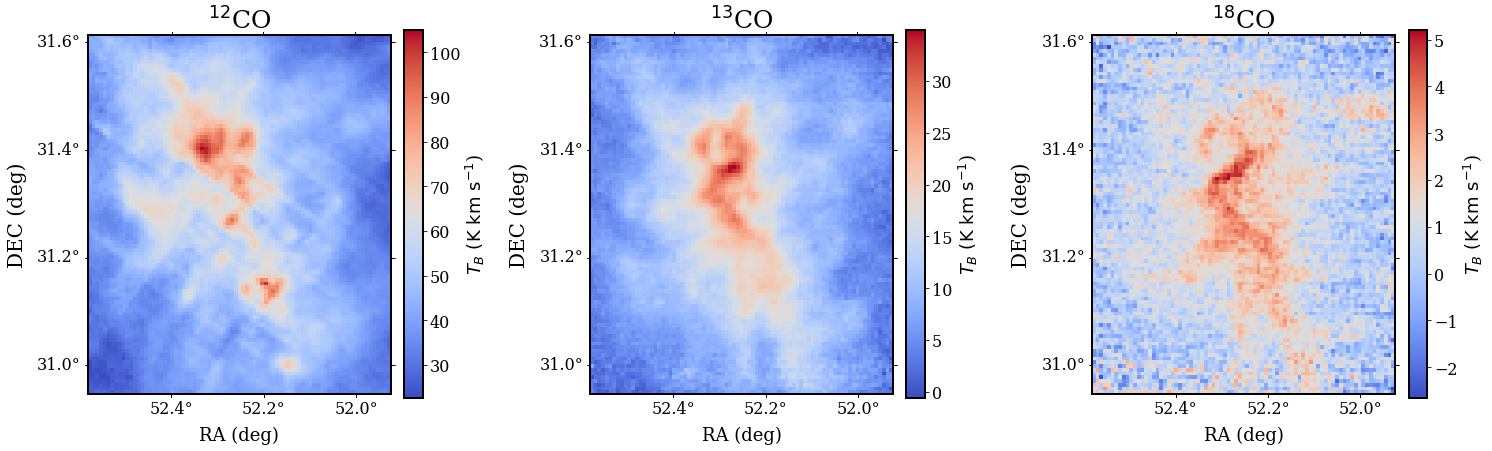

In [5]:
plt.figure(figsize = (24,10))
plt.subplots_adjust(wspace = 0.5)

## 12CO
ax = plt.subplot(131, projection=co12.wcs.celestial)
plt.imshow(co12_moment0, cmap = 'coolwarm')
cb = plt.colorbar(fraction=0.055, pad=0.04)
ax.set_xlabel('RA (deg)', fontsize = 18)
ax.set_ylabel('DEC (deg)', fontsize = 20)
cb.set_label(r'$T_B \ (\rm K \ km \ s^{-1}$)', fontsize = 18)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_fontsize(16)
for axc in ax.coords: axc.set_format_unit('deg', decimal = True) 
ax.tick_params(labelsize = 16)

ax.set_title('$^{12}$CO', fontsize = 25)

## 13CO
ax = plt.subplot(132, projection=co12.wcs.celestial)
plt.imshow(co13_moment0, cmap = 'coolwarm')
cb = plt.colorbar(fraction=0.055, pad=0.04)
ax.set_xlabel('RA (deg)', fontsize = 18)
ax.set_ylabel('DEC (deg)', fontsize = 20)
cb.set_label(r'$T_B \ (\rm K \ km \ s^{-1}$)', fontsize = 18)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_fontsize(16)
for axc in ax.coords: axc.set_format_unit('deg', decimal = True) 
ax.tick_params(labelsize = 16)

ax.set_title('$^{13}$CO', fontsize = 25)


## 18CO
ax = plt.subplot(133, projection=co12.wcs.celestial)
plt.imshow(co18_moment0, cmap = 'coolwarm')
cb = plt.colorbar(fraction=0.055, pad=0.04)
ax.set_xlabel('RA (deg)', fontsize = 18)
ax.set_ylabel('DEC (deg)', fontsize = 20)
cb.set_label(r'$T_B \ (\rm K \ km \ s^{-1}$)', fontsize = 18)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_fontsize(16)
for axc in ax.coords: axc.set_format_unit('deg', decimal = True) 
ax.tick_params(labelsize = 16)

ax.set_title('$^{18}$CO', fontsize = 25)


# plt.savefig('IntegratedIntensityMaps.pdf', bbox_inches = 'tight')

# Question 2b

In [6]:
co12_np = np.asarray(co12) * 2
co_12_max = np.max(co12_np, axis = 0)

In [7]:
Texmap = 5.5 / np.log(1 + (5.5)/(co_12_max + 0.82))

Text(0.5, 1.0, 'Excitation Temperature')

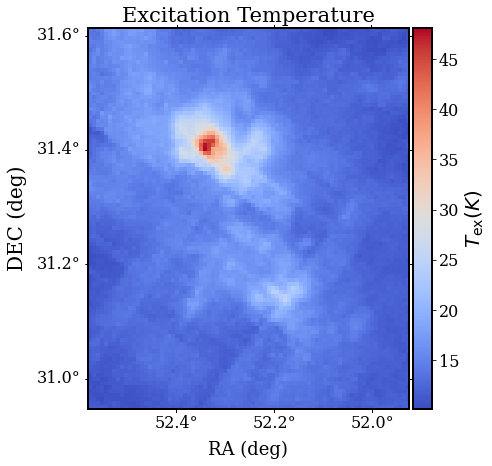

In [8]:
plt.figure(figsize = (7,7))
plt.subplots_adjust(wspace = 0.5)

ax = plt.subplot(111, projection=co12.wcs.celestial)
plt.imshow(Texmap, cmap = 'coolwarm')
cb = plt.colorbar(fraction=0.055, pad=0.01)
ax.set_xlabel('RA (deg)', fontsize = 18)
ax.set_ylabel('DEC (deg)', fontsize = 20)
cb.set_label(r'$T_{\rm ex} (K)$', fontsize = 20)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_fontsize(16)
for axc in ax.coords: axc.set_format_unit('deg', decimal = True) 
ax.tick_params(labelsize = 16)

ax.set_title('Excitation Temperature', fontsize = 21)

# plt.savefig('TexMap.pdf', bbox_inches = 'tight')

In [9]:
np.nanmax(Texmap)

48.068283

# ALL MASSES 

In [10]:
vspacing = 0.133 * u.km/u.s
m_h = (const.m_p + const.m_e)
coeff = 1.95 * 10**3

pix_side = (25 * u.arcsecond).to(u.radian)
phys_length = (300 * u.pc) * np.tan(pix_side)
phys_area_pix = (phys_length**2).to(u.cm**2)

# 12CO MASSES 

In [11]:
Ju = 1
gu = 2*Ju + 1
Jl = 0
gl = 2*Jl + 1

Aul = 7.4e-8 
nu = (115.27 * u.GHz).value
B  = (57635 * u.MHz).to(u.GHz)

In [12]:
Nl_map = coeff * (gl/gu) * (nu**2 / Aul) * (co12_moment0) * (u.cm**-2) 
Z = (const.k_B.cgs * Texmap*u.K)/(const.h * B)
Ntot = Nl_map * Z.decompose()
masses = Ntot.to(u.kpc**-2) * 2 *  m_h.to(u.Msun) * 10**4 * phys_area_pix.to(u.kpc**2)

In [13]:
np.sum(masses) 

<Quantity 50.62948367 solMass>

# 13CO Masses

In [14]:
Ju = 1
gu = 2*Ju + 1
Jl = 0
gl = 2*Jl + 1

Aul = 6.5e-8 
nu = (110.201370 * u.GHz).value
B  = (55101.* u.MHz).to(u.GHz)

In [15]:
Nl_map = coeff * (gl/gu) * (nu**2 / Aul) * (co13_moment0) * (u.cm**-2) 
Z = (const.k_B.cgs * Texmap*u.K)/(const.h * B)
Ntot = Nl_map * Z.decompose()
masses = Ntot.to(u.kpc**-2) * 2 *  m_h.to(u.Msun) * 10**4 * 62 * phys_area_pix.to(u.kpc**2)

In [16]:
np.sum(masses) 

<Quantity 767.15151354 solMass>

# C18O Masses

In [17]:
Ju = 1
gu = 2*Ju + 1
Jl = 0
gl = 2*Jl + 1

Aul = 6.5e-8 
nu = (109.782182  * u.GHz).value
B  = (54891* u.MHz).to(u.GHz)

In [18]:
Nl_map = coeff * (gl/gu) * (nu**2 / Aul) * (co18_moment0) * (u.cm**-2) 
Z = (const.k_B.cgs * Texmap*u.K)/(const.h * B)
Ntot = Nl_map * Z.decompose()
masses = Ntot.to(u.kpc**-2) * 2 *  m_h.to(u.Msun) * 10**4 * 500 * phys_area_pix.to(u.kpc**2)

In [19]:
np.sum(masses) 

<Quantity 548.67576872 solMass>

# FIND CORES IN C18O

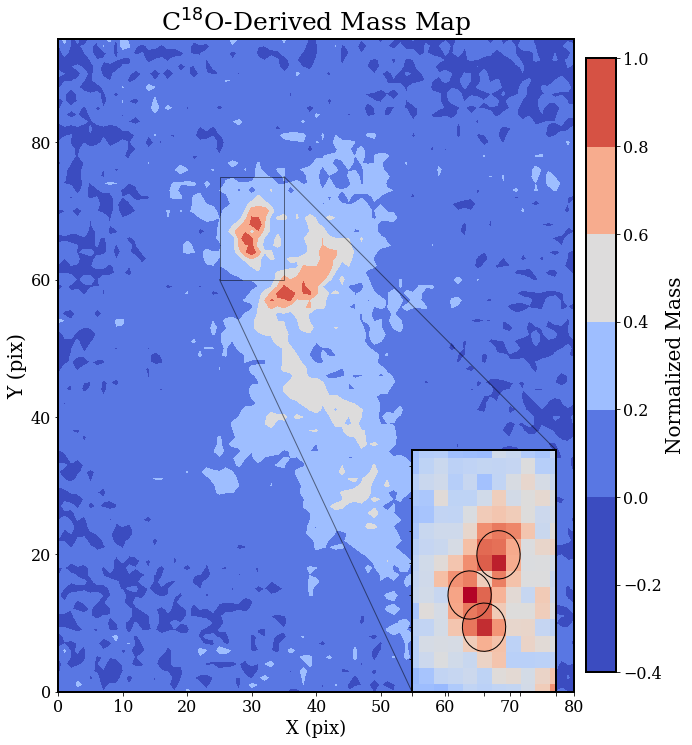

In [20]:
plt.figure(figsize = (10,12))
# plt.subplots_adjust(wspace = 0.5)

## 12CO
ax = plt.subplot(111)
# ax.imshow(masses/masses.max(), cmap = 'coolwarm')

plt.contourf(masses.value / masses.max(), cmap = 'coolwarm', vmin = 0)
cb = plt.colorbar(fraction=0.055, pad=0.02)
ax.set_xlabel('X (pix)', fontsize = 18)
ax.set_ylabel('Y (pix)', fontsize = 20)
cb.set_label(r'Normalized Mass', fontsize = 20)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_fontsize(16)
# for axc in ax.coords: axc.set_format_unit('deg', decimal = True) 
ax.tick_params(labelsize = 16)



axins = ax.inset_axes([0.65, 0.0, 0.35, 0.37])

x1, x2, y1, y2 = 25, 35, 60, 75
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])

ax.indicate_inset_zoom(axins, edgecolor="black")
#######################################################################################
geometry0 = EllipseGeometry(x0 = 30, y0= 64, sma= 1.5, eps=0.0,
                           pa= 75  * np.pi / 180.0)
ellipse0 = Ellipse(masses, geometry0)
aper0 = EllipticalAperture((geometry0.x0, geometry0.y0), geometry0.sma,
                          geometry0.sma,
                          geometry0.pa)

aper0.plot(color='black', lw = 1, axes = axins)
#######################################################################################
geometry1 = EllipseGeometry(x0 = 29, y0= 66, sma= 1.5, eps=0.0,
                           pa= 75  * np.pi / 180.0)
ellipse1 = Ellipse(masses, geometry1)
aper1 = EllipticalAperture((geometry1.x0, geometry1.y0), geometry1.sma,
                          geometry1.sma,
                          geometry1.pa)

aper1.plot(color='black', lw = 1, axes = axins)
#######################################################################################
geometry2 = EllipseGeometry(x0 = 31, y0= 68.5, sma= 1.5, eps=0.0,
                           pa= 75  * np.pi / 180.0)
ellipse2 = Ellipse(masses, geometry2)
aper2 = EllipticalAperture((geometry2.x0, geometry2.y0), geometry2.sma,
                          geometry2.sma,
                          geometry2.pa)

aper2.plot(color='black', lw = 1, axes = axins)
##################################################################################


axins.imshow(masses.value, origin="lower", cmap = 'coolwarm')
ax.set_title('C$^{18}$O-Derived Mass Map', fontsize = 25)
plt.savefig('CoreMap.pdf', bbox_inches = 'tight')

In [21]:
aper.plot?

Object `aper.plot` not found.


In [22]:
R = phys_length * 1.5
V = (4/3) * np.pi * R**3
print(R,V)
rho1 = 3.37 * u.Msun / V
print(rho1)

0.05454153939189943 pc 0.0006796272495164646 pc3
4958.6004716521575 solMass / pc3


In [23]:
aperture_photometry(masses,aper0)

id,xcenter,ycenter,aperture_sum
,pix,pix,solMass
int64,float64,float64,float64
1,30.0,64.0,3.3704595355054265


In [24]:
aperture_photometry(masses,aper1)

id,xcenter,ycenter,aperture_sum
,pix,pix,solMass
int64,float64,float64,float64
1,29.0,66.0,3.6054867773883936


In [25]:
aperture_photometry(masses,aper2)

id,xcenter,ycenter,aperture_sum
,pix,pix,solMass
int64,float64,float64,float64
1,31.0,68.5,3.6480710295444645


In [26]:
(((5 * const.k_B * (13 * u.K))/(const.G * 2 * m_h))**(3/2) * (3/(4 * np.pi * rho1))**(1/2)).to(u.Msun)

<Quantity 3.41533337 solMass>

# OPTICALLY THICK 13CO

In [29]:
co13_np = np.asarray(co13) * 2
co_13_max = np.max(co13_np, axis = 0) * u.K

numerator = co_13_max / (5.3 * u.K)
denominator = ((np.exp((5.3 * u.K)/(Texmap*u.K)) - 1)**(-1)) - 0.16

tau_map_13 = -1 * np.log(1 - numerator/denominator)

In [30]:
first_term = (tau_map_13)/(1 - np.exp(-tau_map_13))
coeff = 3e14
last_term = co13_moment0 / (1 - np.exp(-5.3/Texmap))

n13co_map = (first_term * coeff * last_term) * u.cm**-2
nh2map_thick = 10**4 * 62 * n13co_map
mass_thick = (nh2map_thick * 2 * m_h * phys_area_pix).to(u.Msun)

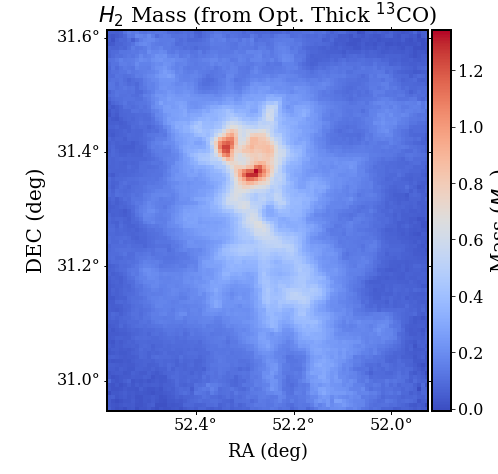

In [36]:
plt.figure(figsize = (7,7))
plt.subplots_adjust(wspace = 0.5)

ax = plt.subplot(111, projection=co12.wcs.celestial)
plt.imshow(mass_thick, cmap = 'coolwarm')
cb = plt.colorbar(fraction=0.055, pad=0.01)
ax.set_xlabel('RA (deg)', fontsize = 18)
ax.set_ylabel('DEC (deg)', fontsize = 20)
cb.set_label(r'Mass ($M_{\odot}$)', fontsize = 20)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_fontsize(16)
for axc in ax.coords: axc.set_format_unit('deg', decimal = True) 
ax.tick_params(labelsize = 16)

ax.set_title('$H_2$ Mass (from Opt. Thick $^{13}$CO)', fontsize = 21)

plt.savefig('13CO_MassMap.pdf', bbox_inches = 'tight')

In [37]:
np.sum(mass_thick)

<Quantity 1517.02229744 solMass>